# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [117]:
df = pd.read_csv("climate_change_data.csv") #putting the downloaded data into a dataframe

df.head() #get a sense of what the data looks like
    

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [118]:
df.columns #print column names


Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [119]:
# Renaming columns for easier comprehension, and also ability to call them later (so we need to eliminate the spaces)
df = df.rename(columns={"CO2 Emissions": "CO2_Emissions", "Sea Level Rise": "Sea_Level_Rise", "Wind Speed": "Wind_Speed"})

In [120]:
df.columns #print column names again to check it's all good

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2_Emissions',
       'Sea_Level_Rise', 'Precipitation', 'Humidity', 'Wind_Speed'],
      dtype='object')

In [121]:
duplicate_rows_df = df[df.duplicated()] # Checking for duplicates
print("Number of duplicated rows: ", duplicate_rows_df.shape)
#there are no duplicates, so we can skip the step of addressing or dropping data

Number of duplicated rows:  (0, 9)


In [122]:
df.shape #check size of dataframe

(10000, 9)

In [123]:
df.dtypes #checking the data types of each column
#this shows me that this dataset is mostly numbers, and they are not necc whole numbers. 
#it also shows me that dates are not encoded as numbers

Date               object
Location           object
Country            object
Temperature       float64
CO2_Emissions     float64
Sea_Level_Rise    float64
Precipitation     float64
Humidity          float64
Wind_Speed        float64
dtype: object

In [124]:
#using value counts as a way to establish how many unique fields are in a column
#this tells me that the data is continuous, and that value counts isn't going to give me the kind of information i really need
Value_Date = df.Date.value_counts()
ValueLocation = df.Location.value_counts()
ValueCountry = df.Country.value_counts()
ValueEmissions = df['CO2_Emissions'].value_counts()
ValueSeaRise = df.Sea_Level_Rise.value_counts()
ValuePrecipitation = df.Precipitation.value_counts()
ValueHumidity = df.Humidity.value_counts()
ValueWindSpeed = df.Wind_Speed.value_counts()

print("Date values: ", Value_Date)
print("Location values: ", ValueLocation) 
print("Country values: ", ValueCountry) 
print("Emissions values: ", ValueEmissions) 
print("Sea Rise values: ", ValueSeaRise)  
print("Precipitation values: ", ValuePrecipitation)
print("Humidity values: ", ValueHumidity)
print("Wind speed values: ", ValueWindSpeed) 


Date values:  2000-01-01 00:00:00.000000000    1
2015-05-05 08:38:53.033303296    1
2015-04-29 11:30:50.225022464    1
2015-04-30 07:40:33.483348288    1
2015-05-01 03:50:16.741674112    1
                                ..
2007-08-31 23:59:59.999999968    1
2007-09-01 20:09:43.258325824    1
2007-09-02 16:19:26.516651648    1
2007-09-03 12:29:09.774977472    1
2022-12-31 00:00:00.000000000    1
Name: Date, Length: 10000, dtype: int64
Location values:  North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: Location, Length: 7764, dtype: int64
Country values:  Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon  

In [125]:
df.mean(axis=0) #getting the mean of each column that has numeric values

C:\Users\19739\AppData\Local\Temp\ipykernel_23712\308820539.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean(axis=0) #getting the mean of each column that has numeric values


Temperature        14.936034
CO2_Emissions     400.220469
Sea_Level_Rise     -0.003152
Precipitation      49.881208
Humidity           49.771302
Wind_Speed         25.082066
dtype: float64

In [126]:
df['Country'].unique() #this tells me that there are too many countries to use each country as a bin;
#I might be better off binning my continent or regions instead

array(['Latvia', 'South Africa', 'French Guiana', 'Vietnam', 'Moldova',
       'Saint Helena', 'Tuvalu', 'Australia', 'Qatar', 'Chad', 'Fiji',
       'Guernsey', 'Egypt', 'Rwanda', 'Samoa', 'Mongolia',
       'Equatorial Guinea', 'Libyan Arab Jamahiriya', 'Mali',
       'Cocos (Keeling) Islands', 'Bahrain',
       'French Southern Territories', 'Iceland', 'Tajikistan',
       'Norfolk Island', 'Bosnia and Herzegovina', 'Reunion', 'Ethiopia',
       'Spain', 'Italy', 'Andorra', 'Gibraltar', 'Monaco', 'Comoros',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Czech Republic', 'Iran', 'Antigua and Barbuda', 'Seychelles',
       'Slovenia', 'Gabon', 'India', 'Congo', 'Tunisia', 'Costa Rica',
       'Cuba', 'Grenada', 'Suriname', 'Brunei Darussalam',
       'United States of America', 'Israel', 'Georgia', 'Cape Verde',
       'Ukraine', 'Colombia', 'Guyana', 'Estonia', 'Cambodia', 'Maldives',
       'Greece', 'Kenya', 'Marshall Islands', 'Korea', 'Dominica',
       'Ch

In [127]:
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Define bins for year grouping
bins = [pd.Timestamp(2000, 1, 1), pd.Timestamp(2005, 1, 1), pd.Timestamp(2010, 1, 1), pd.Timestamp(2015, 1, 1), pd.Timestamp(2020, 1, 1), pd.Timestamp(2022, 1, 1)]

# Define labels for the groups
group_names = ['2000-2005', '2005-2010', '2010-2015', '2015-2020', '2020-2022']

# Use pd.cut to create a new column 'DateBins' based on the bins
df['DateBins'] = pd.cut(df['Date'], bins=bins, labels=group_names, right=False)

# Display the updated DataFrame
df.head()



,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,DateBins
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000-2005
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000-2005
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000-2005
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000-2005
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000-2005


In [196]:
#import country to continent list
from io import StringIO

# Raw data
data = """Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad
Africa,Comoros
Africa,Congo
Africa,"Congo, Democratic Republic of"
Africa,Djibouti
Africa,Egypt
Africa,Equatorial Guinea
Africa,Eritrea
Africa,Ethiopia
Africa,Gabon
Africa,Gambia
Africa,Ghana
Africa,Guinea
Africa,Cote d'Ivoire
Africa,Guinea-Bissau
Africa,Ivory Coast
Africa,Kenya
Africa,Lesotho
Africa,Liberia
Africa,Libya
Africa,Madagascar
Africa,Malawi
Africa,Mali
Africa,Mauritania
Africa,Mauritius
Africa,Morocco
Africa,Mozambique
Africa,Namibia
Africa,Niger
Africa,Nigeria
Africa,Rwanda
Africa,Sao Tome and Principe
Africa,Senegal
Africa,Seychelles
Africa,Sierra Leone
Africa,Somalia
Africa,South Africa
Africa,South Sudan
Africa,Sudan
Africa,Swaziland
Africa,Tanzania
Africa,Togo
Africa,Tunisia
Africa,Uganda
Africa,Zambia
Africa,Zimbabwe
Asia,Afghanistan
Asia,Bahrain
Asia,Bangladesh
Asia,Bhutan
Asia,Brunei
Asia,Burma (Myanmar)
Asia,Cambodia
Asia,China
Asia,East Timor
Asia,India
Asia, "British Indian Ocean Territory (Chagos Archipelago)"
Asia,Indonesia
Asia,Iran
Asia,Iraq
Asia,Israel
Asia,Japan
Asia,Jordan
Asia,Kazakhstan
Asia,"Korea, North"
Asia,"Korea, South"
Asia,Kuwait
Asia,Kyrgyzstan
Asia,Laos
Asia,Lebanon
Asia,Malaysia
Asia,Maldives
Asia,Mongolia
Asia,Nepal
Asia,Oman
Asia,Pakistan
Asia,Philippines
Asia,Qatar
Asia,Russian Federation
Asia,Saudi Arabia
Asia,Singapore
Asia,Sri Lanka
Asia,Syria
Asia,Tajikistan
Asia,Thailand
Asia,Turkey
Asia,Turkmenistan
Asia,United Arab Emirates
Asia,Uzbekistan
Asia,Vietnam
Asia,Yemen
Asia,Palestinian Territory
Europe,Albania
Europe,Andorra
Europe,Armenia
Europe,Austria
Europe,Azerbaijan
Europe,Belarus
Europe,Belgium
Europe,Bosnia and Herzegovina
Europe,Bulgaria
Europe,Croatia
Europe,Cyprus
Europe,Czech Republic
Europe,Denmark
Europe,Estonia
Europe,Finland
Europe,France
Europe,Georgia
Europe,Germany
Europe,Greece
Europe,Hungary
Europe,Iceland
Europe,Ireland
Europe,Italy
Europe,Latvia
Europe,Liechtenstein
Europe,Lithuania
Europe,Luxembourg
Europe,Macedonia
Europe,Malta
Europe,Moldova
Europe,Monaco
Europe,Montenegro
Europe,Netherlands
Europe,Norway
Europe,Poland
Europe,Portugal
Europe,Romania
Europe,San Marino
Europe,Serbia
Europe,"Slovakia (Slovak Republic)"
Europe,Slovenia
Europe,Spain
Europe,Sweden
Europe,Switzerland
Europe,Ukraine
Europe,United Kingdom
Europe, Holy See (Vatican City State)
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic
North America,El Salvador
North America,Grenada
North America,Guatemala
North America,Haiti
North America,Honduras
North America,Jamaica
North America,Mexico
North America,Nicaragua
North America,Panama
North America,Saint Kitts Nevis
North America,Saint Lucia
North America,Saint Vincent the Grenadines
North America,Trinidad and Tobago
North America,US
North America, Saint Pierre and Miquelon
Oceania,Australia
Oceania,Fiji
Oceania,Kiribati
Oceania,Marshall Islands
Oceania,Micronesia
Oceania,Nauru
Oceania,New Zealand
Oceania,Palau
Oceania,Papua New Guinea
Oceania,Samoa
Oceania,Solomon Islands
Oceania,Tonga
Oceania,Tuvalu
Oceania,Vanuatu
South America,Argentina
South America,Bolivia
South America,Brazil
South America,Chile
South America,Colombia
South America,Ecuador
South America,Guyana
South America,Paraguay
South America,Peru
South America,Suriname
South America,Uruguay
South America,Venezuela
South America,French Guiana
Oceania,American Samoa
North America,Anguilla
North America,Aruba
North America,Bermuda
Europe,Bouvet Island (Bouvetoya)
Asia,British Indian Ocean Territory (Chagos Archipelago)
North America,British Virgin Islands
Asia,Brunei Darussalam
Africa,Burkina Faso
North America,Cayman Islands
Oceania,Christmas Island
Oceania,Cocos (Keeling) Islands
Oceania,Cook Islands
Africa,Cote d'Ivoir
Europe,Czech Republic
South America,Falkland Islands (Malvinas)
Europe,Faroe Islands
South America,French Guiana
Oceania,French Polynesia
Antarctica,French Southern Territories
Europe,Gibraltar
Europe,Greenland
South America,Guadeloupe
South America,Guam
Europe,Guernsey
Antarctica,Heard Island and McDonald Islands
Europe,Holy See (Vatican City State)
Asia,Hong Kong
Europe,Isle of Man
Europe,Jersey
Asia,Korea
Asia,Kyrgyz Republic
Asia,Lao People's Democratic Republic
Asia,Libyan Arab Jamahiriya
Asia,Macao
North America,Martinique
Asia,Mayotte
North America,Montserrat
Asia, Myanmar
North America,Netherlands Antilles
Oceania,New Caledonia
Oceania,Niue
Oceania,Norfolk Island
Europe,North Macedonia
Oceania,Northern Mariana Islands
Asia,Palestinian Territory
South America,Saint Helena
North America,Saint Barthelemy
Asia,Reunion
North America,United States of America
Europe,Svalbard & Jan Mayen Islands
Oceania,Pitcairn Islands
North America,Turks and Caicos Islands
Antarctica,Antarctica (the territory South of 60 deg S)
Oceania,United States Minor Outlying Islands
North America,Saint Kitts and Nevis
Asia,Timor-Leste
Asia,Taiwan
Asia,Myanmar
North America,Saint Pierre and Miquelon
North America,Puerto Rico
South America,South Georgia and the South Sandwich Islands
Oceania,Tokelau
North America,Saint Vincent and the Grenadines
Africa,Cote d'Ivoire
Africa,Western Sahara
Asia,Taiwan
Oceania,Wallis and Futuna
North America,United States Virgin Islands
North America,Saint Martin
Asia,Syrian Arab Republic
Antarctica, "Antarctica (the territory South of 60 deg S)"""

# Create a DataFrame from the raw data
continents = pd.read_csv(StringIO(data))

# Display the DataFrame
print(continents)

         Continent                                         Country
0           Africa                                         Algeria
1           Africa                                          Angola
2           Africa                                           Benin
3           Africa                                        Botswana
4           Africa                                         Burkina
..             ...                                             ...
266        Oceania                               Wallis and Futuna
267  North America                    United States Virgin Islands
268  North America                                    Saint Martin
269           Asia                            Syrian Arab Republic
270     Antarctica   "Antarctica (the territory South of 60 deg S)

[271 rows x 2 columns]


In [197]:
#merge the two dataframes on their common column, 'country'

merged_df = pd.merge(df, continents, on="Country", how="left")

#now I can do more things and structure my results better!
#checking the new df, seeing that I now have date bins and continent bins as their own columns

merged_df.head(10)

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,DateBins,Continent
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000-2005,Europe
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000-2005,Africa
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000-2005,South America
3,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000-2005,South America
4,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000-2005,Asia
5,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000-2005,Europe
6,2000-01-05 04:48:36.291629162,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908,2000-2005,South America
7,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944,2000-2005,Oceania
8,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,2000-2005,Oceania
9,2000-01-07 17:17:46.066606660,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472,2000-2005,Asia


In [198]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

#check for missing values
missing_continent_rows = merged_df[pd.isna(merged_df['Continent'])]
print(missing_continent_rows['Country'])

# reset the option to its default value 
pd.reset_option('display.max_rows')

#no results/empty set means I got all the countries assigned to a continent!

Series([], Name: Country, dtype: object)


In [199]:
merged_df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2_Emissions',
       'Sea_Level_Rise', 'Precipitation', 'Humidity', 'Wind_Speed', 'DateBins',
       'Continent'],
      dtype='object')

In [200]:
#I want to see an avg temp per date-bin and continent 

#Group by 'Continent' and 'DateBins', and calculate the mean temperature for each group
temperature_changes = merged_df.groupby(['Continent', 'DateBins'])['Temperature'].mean().reset_index()

print(temperature_changes)


        Continent   DateBins  Temperature
0          Africa  2000-2005    15.094722
1          Africa  2005-2010    15.240559
2          Africa  2010-2015    14.609702
3          Africa  2015-2020    15.070274
4          Africa  2020-2022    15.188062
5      Antarctica  2000-2005    14.588458
6      Antarctica  2005-2010    13.683926
7      Antarctica  2010-2015    15.299341
8      Antarctica  2015-2020    15.034678
9      Antarctica  2020-2022    15.715624
10           Asia  2000-2005    15.018101
11           Asia  2005-2010    14.735780
12           Asia  2010-2015    15.116155
13           Asia  2015-2020    14.463704
14           Asia  2020-2022    15.121742
15         Europe  2000-2005    14.914904
16         Europe  2005-2010    14.779265
17         Europe  2010-2015    14.947482
18         Europe  2015-2020    14.959230
19         Europe  2020-2022    14.583931
20  North America  2000-2005    15.124138
21  North America  2005-2010    15.219577
22  North America  2010-2015    15

In [201]:
#I want to examine how far from the mean the temperature varies in each date bin, per continent

# Group by 'DateBins' and 'Continent', and calculate the standard deviation of temperature for each group
temp_std_deviation = merged_df.groupby(['DateBins', 'Continent'])['Temperature'].std().reset_index()

print(temp_std_deviation)

#the lowest deviation is above 2, but it never goes above 6. 2-6 is a small range, and none of these are large deviations


     DateBins      Continent  Temperature
0   2000-2005         Africa     5.125766
1   2000-2005     Antarctica     5.101205
2   2000-2005           Asia     5.045380
3   2000-2005         Europe     5.144690
4   2000-2005  North America     4.640479
5   2000-2005        Oceania     5.263507
6   2000-2005  South America     5.527438
7   2005-2010         Africa     4.934721
8   2005-2010     Antarctica     4.337647
9   2005-2010           Asia     5.031639
10  2005-2010         Europe     5.109354
11  2005-2010  North America     5.244018
12  2005-2010        Oceania     5.107858
13  2005-2010  South America     4.732836
14  2010-2015         Africa     4.879307
15  2010-2015     Antarctica     4.842767
16  2010-2015           Asia     4.990679
17  2010-2015         Europe     5.146316
18  2010-2015  North America     5.018009
19  2010-2015        Oceania     4.962014
20  2010-2015  South America     4.788030
21  2015-2020         Africa     4.990590
22  2015-2020     Antarctica     3

In [202]:
#I want to see an avg humidity per date-bin and continent 

#Group by 'Continent' and 'DateBins', and calculate the mean humidity for each group
humidity_changes = merged_df.groupby(['Continent', 'DateBins'])['Humidity'].mean().reset_index()

print(humidity_changes)
#I want to see an avg humidity per date-bin and continent 

        Continent   DateBins   Humidity
0          Africa  2000-2005  48.244867
1          Africa  2005-2010  50.146513
2          Africa  2010-2015  49.736512
3          Africa  2015-2020  49.900311
4          Africa  2020-2022  49.490821
5      Antarctica  2000-2005  46.919314
6      Antarctica  2005-2010  56.521921
7      Antarctica  2010-2015  51.223511
8      Antarctica  2015-2020  50.162623
9      Antarctica  2020-2022  52.765753
10           Asia  2000-2005  47.661957
11           Asia  2005-2010  48.303057
12           Asia  2010-2015  51.931792
13           Asia  2015-2020  51.093826
14           Asia  2020-2022  50.014266
15         Europe  2000-2005  51.392647
16         Europe  2005-2010  50.358462
17         Europe  2010-2015  51.090578
18         Europe  2015-2020  49.163613
19         Europe  2020-2022  54.784922
20  North America  2000-2005  47.213418
21  North America  2005-2010  49.792116
22  North America  2010-2015  47.545424
23  North America  2015-2020  50.124844


In [203]:
#I want to examine how far from the mean the humidity varies in each date bin, per continent

# Group by 'DateBins' and 'Continent', and calculate the standard deviation of humidity for each group
humid_std_deviation = merged_df.groupby(['DateBins', 'Continent'])['Humidity'].std().reset_index()

print(humid_std_deviation)
#the standard deviations here are MUCH higher, which indicares much bigger humidity swings in all date bins, across all continents

     DateBins      Continent   Humidity
0   2000-2005         Africa  29.103676
1   2000-2005     Antarctica  30.399633
2   2000-2005           Asia  28.752458
3   2000-2005         Europe  28.234960
4   2000-2005  North America  28.906105
5   2000-2005        Oceania  27.949433
6   2000-2005  South America  27.514024
7   2005-2010         Africa  27.940016
8   2005-2010     Antarctica  28.362565
9   2005-2010           Asia  28.775482
10  2005-2010         Europe  28.680403
11  2005-2010  North America  28.738672
12  2005-2010        Oceania  29.586936
13  2005-2010  South America  29.925004
14  2010-2015         Africa  29.203802
15  2010-2015     Antarctica  26.124817
16  2010-2015           Asia  30.040152
17  2010-2015         Europe  29.462001
18  2010-2015  North America  28.477597
19  2010-2015        Oceania  28.439752
20  2010-2015  South America  30.435082
21  2015-2020         Africa  28.990687
22  2015-2020     Antarctica  28.800268
23  2015-2020           Asia  29.011981


In [204]:
#Group by 'Continent' and 'DateBins', and calculate the mean sea level change for each group
sea_level_changes = merged_df.groupby(['Continent', 'DateBins'])['Sea_Level_Rise'].mean().reset_index()

print(sea_level_changes)


        Continent   DateBins  Sea_Level_Rise
0          Africa  2000-2005       -0.016272
1          Africa  2005-2010       -0.089291
2          Africa  2010-2015       -0.062294
3          Africa  2015-2020        0.011832
4          Africa  2020-2022       -0.077040
5      Antarctica  2000-2005        0.248070
6      Antarctica  2005-2010       -0.227071
7      Antarctica  2010-2015       -0.083908
8      Antarctica  2015-2020        0.183307
9      Antarctica  2020-2022       -0.353465
10           Asia  2000-2005        0.050414
11           Asia  2005-2010       -0.049589
12           Asia  2010-2015        0.013766
13           Asia  2015-2020        0.027346
14           Asia  2020-2022        0.102622
15         Europe  2000-2005       -0.012829
16         Europe  2005-2010       -0.069371
17         Europe  2010-2015        0.032845
18         Europe  2015-2020        0.030744
19         Europe  2020-2022       -0.058211
20  North America  2000-2005       -0.000855
21  North 

In [205]:
#I want to examine how far from the mean the sea level varies in each date bin, per continent

# Group by 'DateBins' and 'Continent', and calculate the standard deviation of humidity for each group
sea_std_deviation = merged_df.groupby(['DateBins', 'Continent'])['Sea_Level_Rise'].std().reset_index()

print(sea_std_deviation)

#the standard deviation here is VERY low

     DateBins      Continent  Sea_Level_Rise
0   2000-2005         Africa        1.025891
1   2000-2005     Antarctica        0.948062
2   2000-2005           Asia        0.973379
3   2000-2005         Europe        0.986834
4   2000-2005  North America        0.965034
5   2000-2005        Oceania        0.966315
6   2000-2005  South America        1.020517
7   2005-2010         Africa        0.935723
8   2005-2010     Antarctica        0.938085
9   2005-2010           Asia        0.928128
10  2005-2010         Europe        0.978632
11  2005-2010  North America        0.955388
12  2005-2010        Oceania        1.009679
13  2005-2010  South America        0.997455
14  2010-2015         Africa        1.026662
15  2010-2015     Antarctica        1.084113
16  2010-2015           Asia        1.029189
17  2010-2015         Europe        0.910559
18  2010-2015  North America        1.011735
19  2010-2015        Oceania        0.934414
20  2010-2015  South America        1.061537
21  2015-2

In [206]:
#Group by 'Continent' and 'DateBins', and calculate the mean preciptation for each group
preciptation_changes = merged_df.groupby(['Continent', 'DateBins'])['Precipitation'].mean().reset_index()

print(preciptation_changes)


        Continent   DateBins  Precipitation
0          Africa  2000-2005      49.630568
1          Africa  2005-2010      49.680821
2          Africa  2010-2015      49.639439
3          Africa  2015-2020      52.090479
4          Africa  2020-2022      49.414698
5      Antarctica  2000-2005      49.461631
6      Antarctica  2005-2010      62.151040
7      Antarctica  2010-2015      54.143151
8      Antarctica  2015-2020      43.259809
9      Antarctica  2020-2022      46.633902
10           Asia  2000-2005      48.966627
11           Asia  2005-2010      49.456307
12           Asia  2010-2015      50.461093
13           Asia  2015-2020      49.834114
14           Asia  2020-2022      49.594458
15         Europe  2000-2005      52.196838
16         Europe  2005-2010      49.627171
17         Europe  2010-2015      49.553474
18         Europe  2015-2020      51.328303
19         Europe  2020-2022      46.540750
20  North America  2000-2005      47.781840
21  North America  2005-2010    

In [207]:
#I want to examine how far from the mean the preciptation varies in each date bin, per continent

# Group by 'DateBins' and 'Continent', and calculate the standard deviation of humidity for each group
rain_std_deviation = merged_df.groupby(['DateBins', 'Continent'])['Precipitation'].std().reset_index()

print(rain_std_deviation)

#this is a pretty serious deviation from the mean!

     DateBins      Continent  Precipitation
0   2000-2005         Africa      29.576822
1   2000-2005     Antarctica      32.205366
2   2000-2005           Asia      28.029390
3   2000-2005         Europe      29.547426
4   2000-2005  North America      28.865793
5   2000-2005        Oceania      28.845462
6   2000-2005  South America      27.945198
7   2005-2010         Africa      28.845319
8   2005-2010     Antarctica      27.412922
9   2005-2010           Asia      29.128524
10  2005-2010         Europe      29.247375
11  2005-2010  North America      29.580195
12  2005-2010        Oceania      29.483319
13  2005-2010  South America      27.586430
14  2010-2015         Africa      27.715679
15  2010-2015     Antarctica      26.942378
16  2010-2015           Asia      28.291007
17  2010-2015         Europe      28.790380
18  2010-2015  North America      28.501196
19  2010-2015        Oceania      29.772586
20  2010-2015  South America      29.778647
21  2015-2020         Africa    

In [208]:
#Group by 'Continent' and 'DateBins', and calculate the mean CO2 emissions for each group
co2_changes = merged_df.groupby(['Continent', 'DateBins'])['CO2_Emissions'].mean().reset_index()

print(co2_changes)

        Continent   DateBins  CO2_Emissions
0          Africa  2000-2005     397.997020
1          Africa  2005-2010     400.561578
2          Africa  2010-2015     402.962537
3          Africa  2015-2020     400.072416
4          Africa  2020-2022     398.908706
5      Antarctica  2000-2005     395.908959
6      Antarctica  2005-2010     403.539071
7      Antarctica  2010-2015     404.792374
8      Antarctica  2015-2020     385.099644
9      Antarctica  2020-2022     397.571449
10           Asia  2000-2005     398.804325
11           Asia  2005-2010     402.338266
12           Asia  2010-2015     401.818424
13           Asia  2015-2020     399.966874
14           Asia  2020-2022     401.262333
15         Europe  2000-2005     398.645383
16         Europe  2005-2010     399.093192
17         Europe  2010-2015     397.134506
18         Europe  2015-2020     400.699330
19         Europe  2020-2022     394.732729
20  North America  2000-2005     405.184520
21  North America  2005-2010    

In [209]:
#I want to examine how far from the mean the carbon dioxide emissions varies in each date bin, per continent

# Group by 'DateBins' and 'Continent', and calculate the standard deviation of humidity for each group
carbon_std_deviation = merged_df.groupby(['DateBins', 'Continent'])['CO2_Emissions'].std().reset_index()

print(carbon_std_deviation)
#these deviations from the mean are VERY very large, which means the rate of emissions changes wildly even during small periods

     DateBins      Continent  CO2_Emissions
0   2000-2005         Africa      51.384580
1   2000-2005     Antarctica      52.915750
2   2000-2005           Asia      49.540092
3   2000-2005         Europe      50.210404
4   2000-2005  North America      48.222456
5   2000-2005        Oceania      49.367432
6   2000-2005  South America      54.694326
7   2005-2010         Africa      51.309529
8   2005-2010     Antarctica      52.606856
9   2005-2010           Asia      49.106052
10  2005-2010         Europe      49.625965
11  2005-2010  North America      49.400471
12  2005-2010        Oceania      47.270214
13  2005-2010  South America      51.601280
14  2010-2015         Africa      46.011844
15  2010-2015     Antarctica      46.166582
16  2010-2015           Asia      50.475416
17  2010-2015         Europe      49.297015
18  2010-2015  North America      46.871747
19  2010-2015        Oceania      46.919552
20  2010-2015  South America      50.262164
21  2015-2020         Africa    

In [210]:

#Group by 'Continent' and 'DateBins', and calculate the mean wind speed for each group
wind_changes = merged_df.groupby(['Continent', 'DateBins'])['Wind_Speed'].mean().reset_index()

print(wind_changes)


        Continent   DateBins  Wind_Speed
0          Africa  2000-2005   24.885260
1          Africa  2005-2010   24.369461
2          Africa  2010-2015   25.377817
3          Africa  2015-2020   25.032416
4          Africa  2020-2022   24.973401
5      Antarctica  2000-2005   24.233970
6      Antarctica  2005-2010   31.848622
7      Antarctica  2010-2015   23.427471
8      Antarctica  2015-2020   18.844071
9      Antarctica  2020-2022   23.899507
10           Asia  2000-2005   25.887785
11           Asia  2005-2010   24.630990
12           Asia  2010-2015   24.698878
13           Asia  2015-2020   24.909328
14           Asia  2020-2022   24.903407
15         Europe  2000-2005   24.859971
16         Europe  2005-2010   24.640334
17         Europe  2010-2015   24.449160
18         Europe  2015-2020   24.322292
19         Europe  2020-2022   25.615716
20  North America  2000-2005   25.142364
21  North America  2005-2010   24.656285
22  North America  2010-2015   24.819558
23  North Americ

In [211]:
#I want to examine how far from the mean the wind speed varies in each date bin, per continent

# Group by 'DateBins' and 'Continent', and calculate the standard deviation of humidity for each group
wind_std_deviation = merged_df.groupby(['DateBins', 'Continent'])['Wind_Speed'].std().reset_index()

print(wind_std_deviation)
#this is a notable deviation, but not as much as with the humidity. 
#however, there's also a bigger spread between the largest and smallest SD results! which is interesting

     DateBins      Continent  Wind_Speed
0   2000-2005         Africa   14.672413
1   2000-2005     Antarctica   12.873601
2   2000-2005           Asia   14.445511
3   2000-2005         Europe   14.429183
4   2000-2005  North America   14.536724
5   2000-2005        Oceania   14.085667
6   2000-2005  South America   14.116404
7   2005-2010         Africa   14.555867
8   2005-2010     Antarctica   12.805118
9   2005-2010           Asia   14.072531
10  2005-2010         Europe   14.944667
11  2005-2010  North America   14.928593
12  2005-2010        Oceania   14.508010
13  2005-2010  South America   14.741636
14  2010-2015         Africa   14.245820
15  2010-2015     Antarctica   14.854905
16  2010-2015           Asia   15.068554
17  2010-2015         Europe   14.271915
18  2010-2015  North America   14.792333
19  2010-2015        Oceania   14.131784
20  2010-2015  South America   13.875072
21  2015-2020         Africa   14.230095
22  2015-2020     Antarctica   11.425797
23  2015-2020   

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Figure size 1200x600 with 0 Axes>

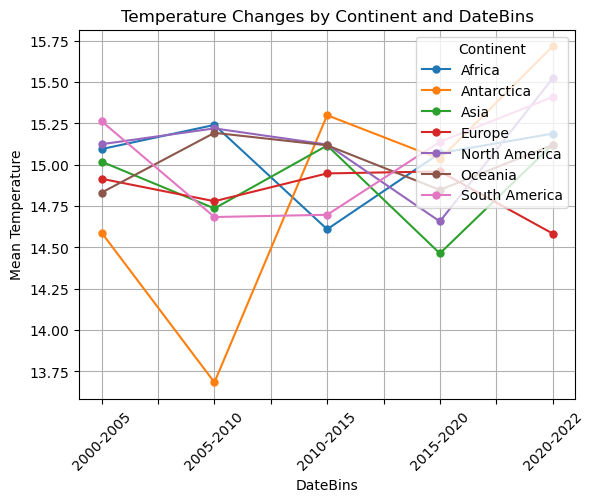

In [212]:
# Group the data by 'Continent' and 'DateBins' and calculate the mean temperature
grouped = merged_df.groupby(['DateBins','Continent'])['Temperature'].mean().unstack()

# Plot the temperature changes for each group
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', markersize=5)
plt.xlabel('DateBins')
plt.ylabel('Mean Temperature')
plt.title('Temperature Changes by Continent and DateBins')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper right')
plt.show()



<Figure size 1200x600 with 0 Axes>

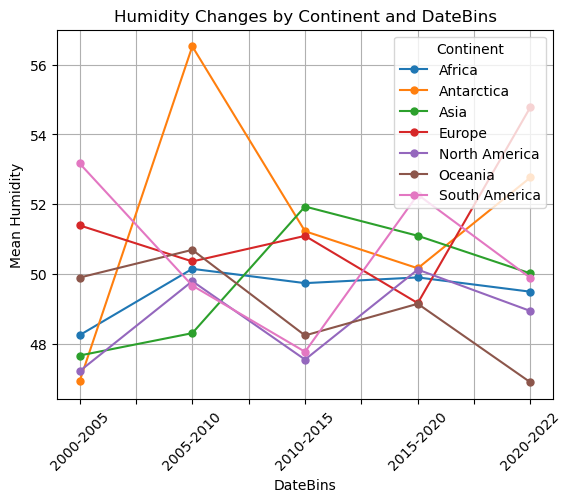

In [213]:
# Group the data by 'Continent' and 'DateBins' and calculate the mean humidity
grouped = merged_df.groupby(['DateBins','Continent'])['Humidity'].mean().unstack()

# Plot the changes for each group
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', markersize=5)
plt.xlabel('DateBins')
plt.ylabel('Mean Humidity')
plt.title('Humidity Changes by Continent and DateBins')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper right')
plt.show()


<Figure size 1200x600 with 0 Axes>

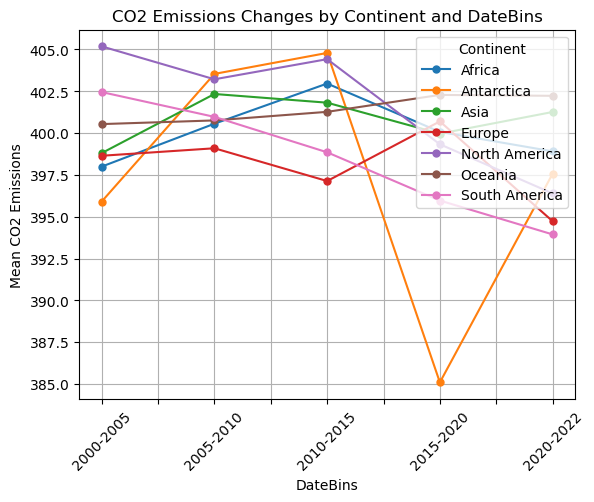

In [214]:
# Group the data by 'Continent' and 'DateBins' and calculate the mean carbon dioxide emissions
grouped = merged_df.groupby(['DateBins','Continent'])['CO2_Emissions'].mean().unstack()

# Plot the changes for each group
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', markersize=5)
plt.xlabel('DateBins')
plt.ylabel('Mean CO2 Emissions')
plt.title('CO2 Emissions Changes by Continent and DateBins')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper right')
plt.show()


<Figure size 1200x600 with 0 Axes>

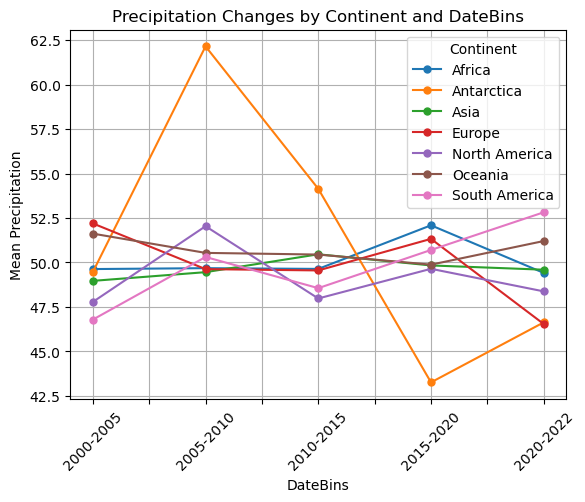

In [218]:
# Group the data by 'Continent' and 'DateBins' and calculate the mean precipitation emissions
grouped = merged_df.groupby(['DateBins','Continent'])['Precipitation'].mean().unstack()

# Plot the changes for each group
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', markersize=5)
plt.xlabel('DateBins')
plt.ylabel('Mean Precipitation')
plt.title('Precipitation Changes by Continent and DateBins')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper right')
plt.show()

<Figure size 1200x600 with 0 Axes>

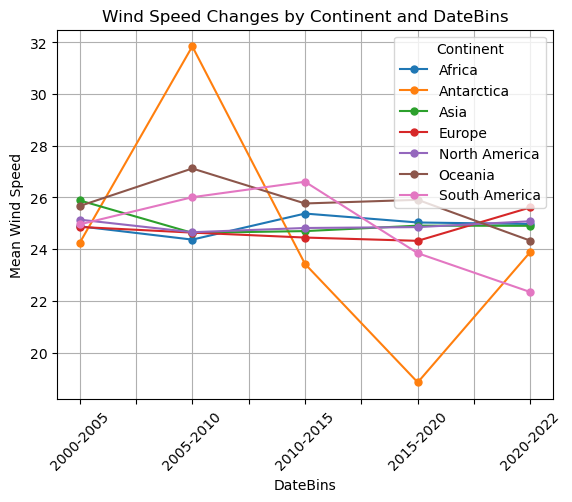

In [215]:
# Group the data by 'Continent' and 'DateBins' and calculate the mean wind speed 
grouped = merged_df.groupby(['DateBins','Continent'])['Wind_Speed'].mean().unstack()

# Plot the changes for each group
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', markersize=5)
plt.xlabel('DateBins')
plt.ylabel('Mean Wind Speed')
plt.title('Wind Speed Changes by Continent and DateBins')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper right')
plt.show()

<Figure size 1200x600 with 0 Axes>

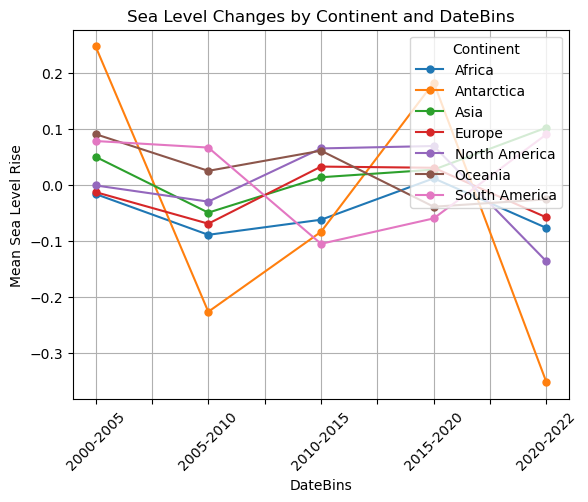

In [217]:
# Group the data by 'Continent' and 'DateBins' and calculate the sea level rise 
grouped = merged_df.groupby(['DateBins','Continent'])['Sea_Level_Rise'].mean().unstack()

# Plot the changes for each group
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o', markersize=5)
plt.xlabel('DateBins')
plt.ylabel('Mean Sea Level Rise')
plt.title('Sea Level Changes by Continent and DateBins')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper right')
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
The sea level changes are pretty whacky, and they seem to even out by the end of the 22 year period. Every date-group had SOMETHING go whacky, but it was always something different. The whackiness in sea-levels don't match up with the whackiness in temperature swings, for example.

2. Do you have any concerns about your dataset? 
I want to create a heat map on an actual map of the globe so we can see the changes in temperature, sea level, carbon emissions, etc., month on month, not just year on year. But that seems very granular, and I am concerned how to approach that task in Python. I am pretty sure I can do it Tableau.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
There doesn't seem to be duplicates, which is my biggest concern, and I am unsure what there is that needs to be cleaned before I do the transformation step. I do see that I get NaN results on some of my inquiries, so I know I have to hunt down the empty cells and consider how to address the missing data. Also, some data seems to be missing for Antarctica especially, because the charts don't always look quite right...